In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.linear_model import Ridge, Lasso
sns.set_style('darkgrid')

In [2]:
crime = pd.read_csv('UScrime.csv')
crime = crime.rename(columns={'M.F':'MF'})
crime.head()

,M,So,Ed,Po1,Po2,LF,MF,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


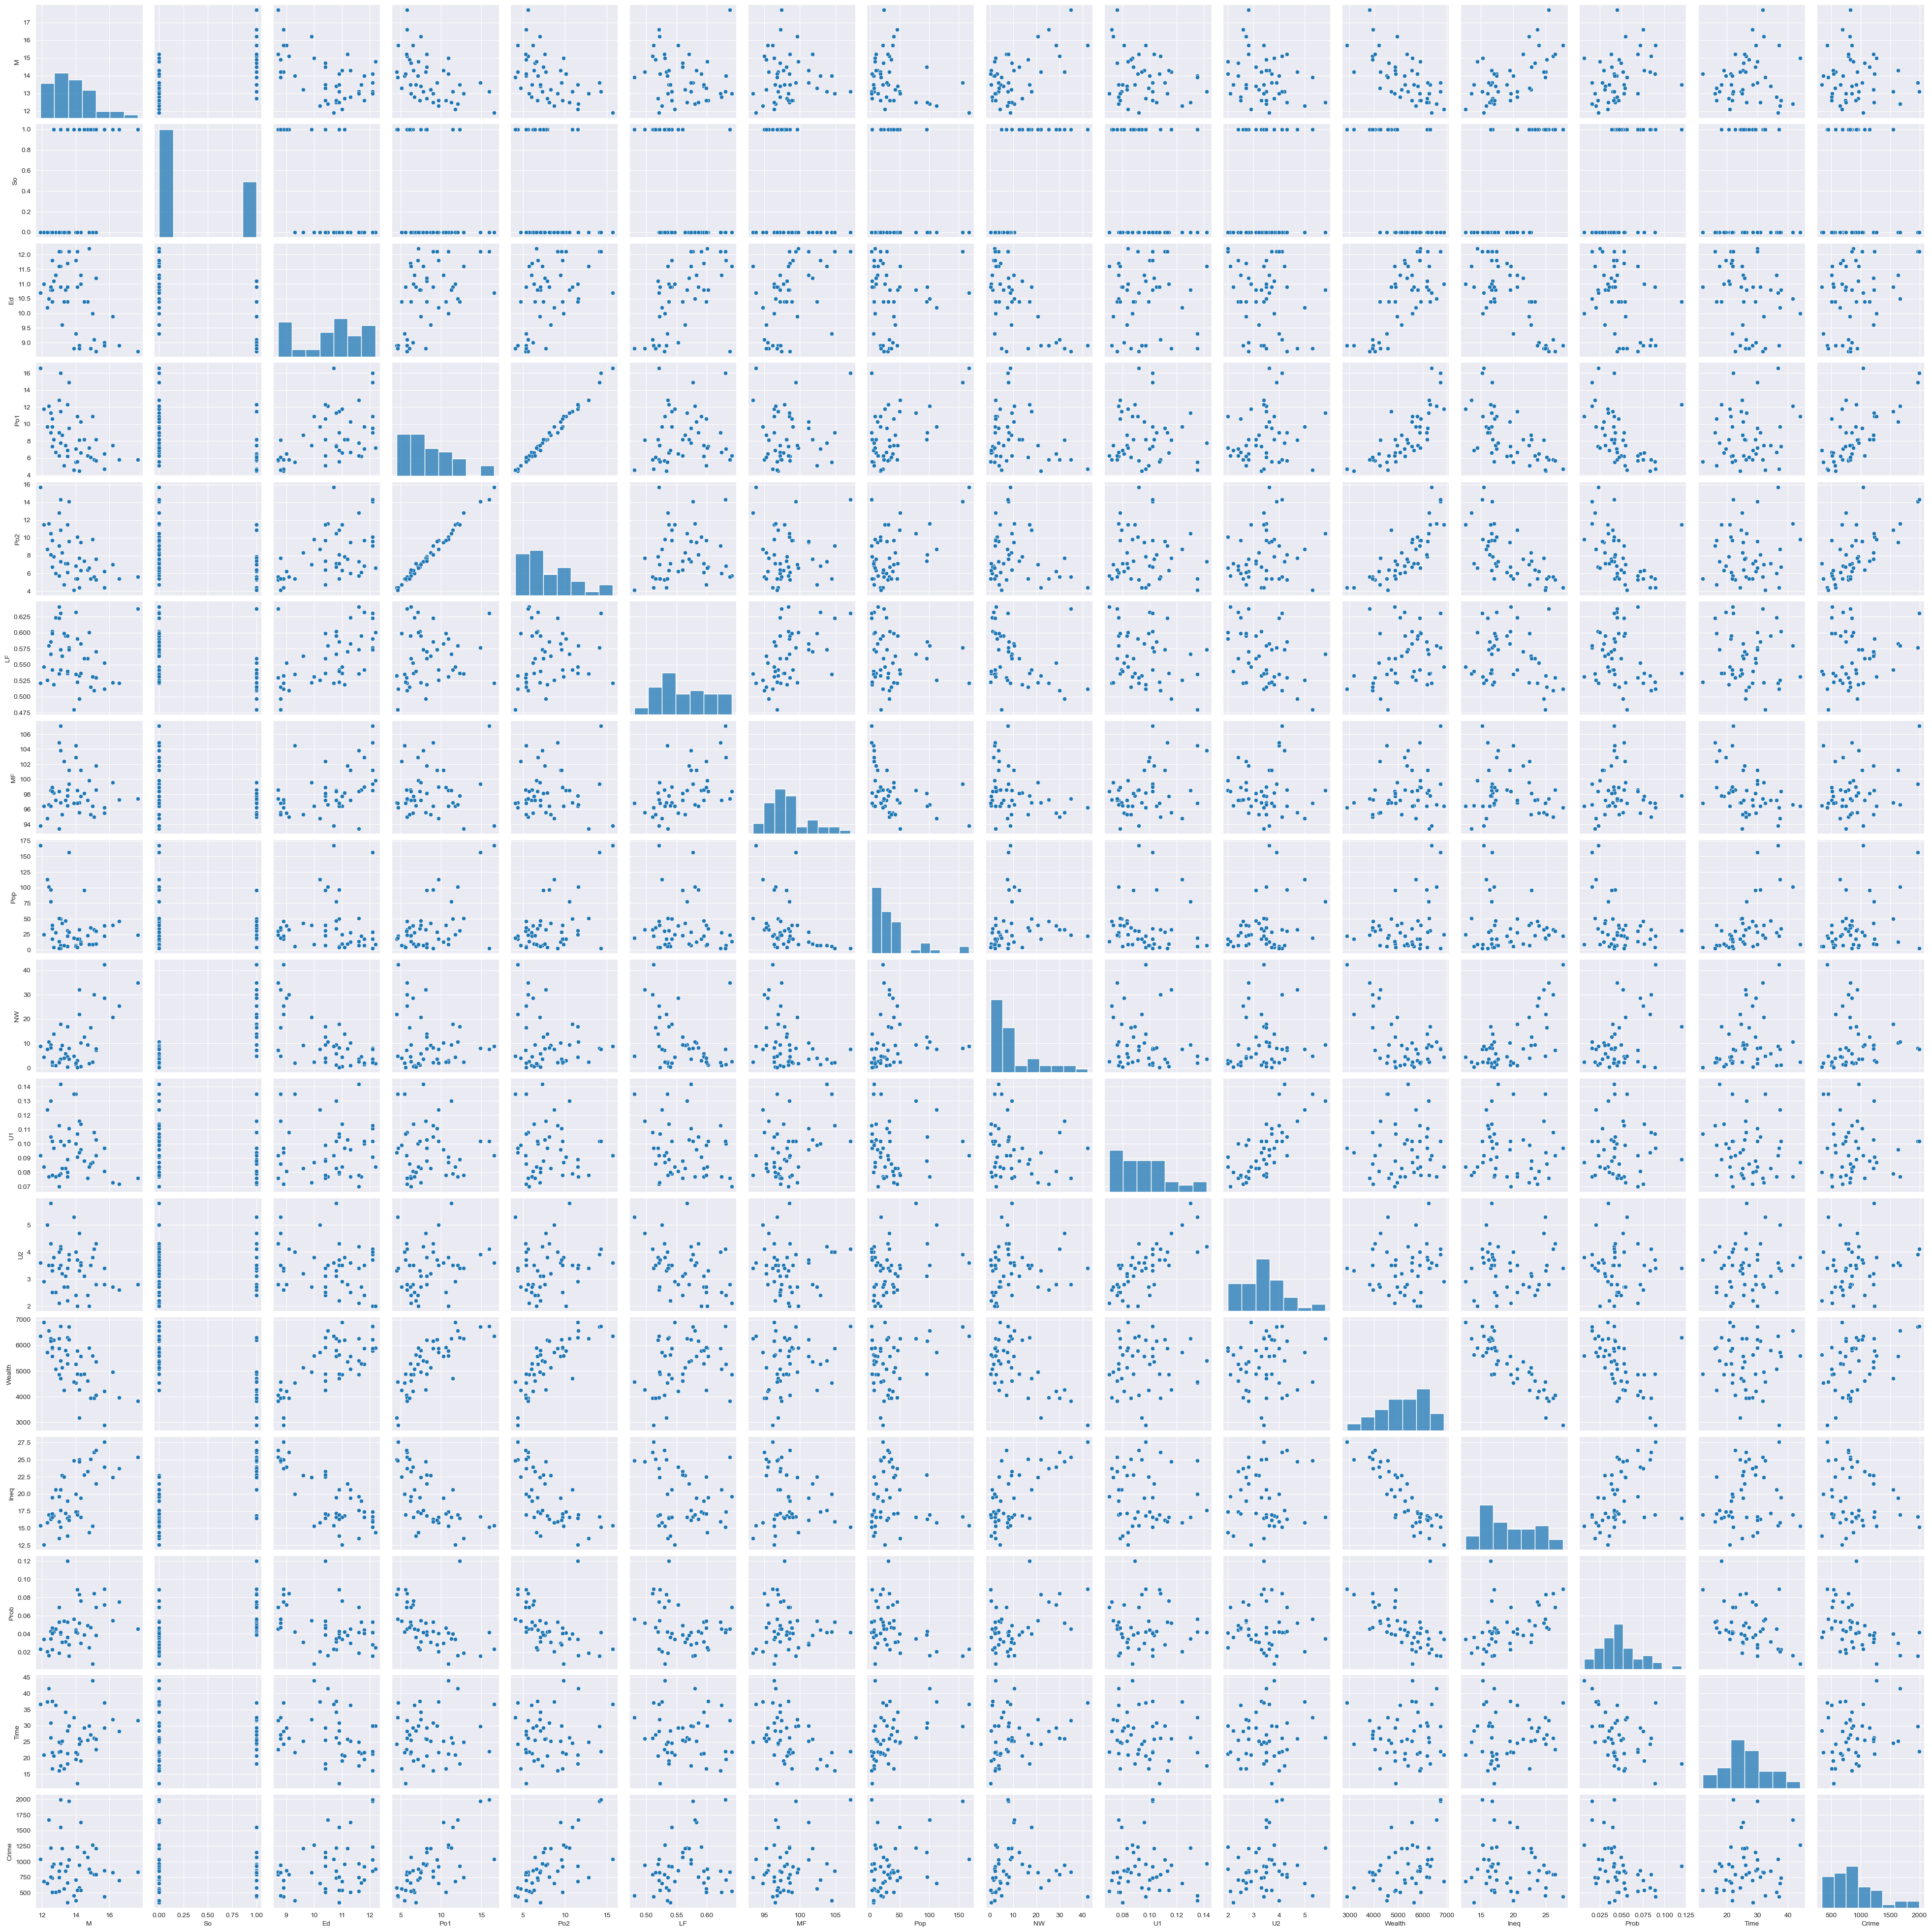

In [3]:
sns.pairplot(crime)

From the pairplot it looks like the highest correlation with Crime is Po1, Po2. The rest are more difficult to see, but maybe Ed, LF, MF, Wealth, Ineq (neg), Prob (neg).  
Po1 and Po2 are highly correlated as well as U1 and U2.  
Ineq and Wealth look to have a neg correlation.  
Ineq and Prob look to be correlated.  


In [3]:
# separate X and y
X = crime.copy().drop('Crime',axis=1)
y = crime['Crime']

In [5]:
# Normalize data
num_cols = X.shape[1]
for col in X.columns:
    X[col] = stats.zscore(X[col])  # Centers and scales

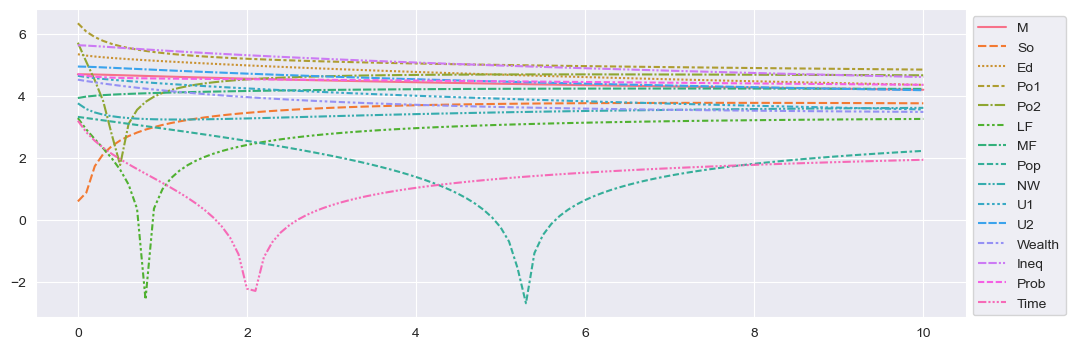

In [6]:
# Ridge Regression
alpha_rng = np.linspace(0,10,101)
df = pd.DataFrame(columns=X.columns)
for alpha in alpha_rng:
    ridge_model = Ridge(alpha=alpha).fit(X, y)
    df.loc[alpha] = np.abs(ridge_model.coef_)

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=np.log(df), ax=ax)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [7]:
alpha = 10 
ridge_model = Ridge(alpha=alpha).fit(X,y)
ridge_coef = pd.DataFrame({'term':X.columns,'coef':ridge_model.coef_})
ridge_coef['abs_coef'] = np.abs(ridge_coef['coef'])
ridge_coef.sort_values('abs_coef', ascending=False)

,term,coef,abs_coef
3,Po1,127.060070,127.060070
4,Po2,105.655524,105.655524
12,Ineq,99.953285,99.953285
2,Ed,77.716528,77.716528
13,Prob,-77.702472,77.702472
6,MF,68.125628,68.125628
0,M,66.315038,66.315038
10,U2,65.278180,65.278180
1,So,42.799870,42.799870
8,NW,36.938092,36.938092


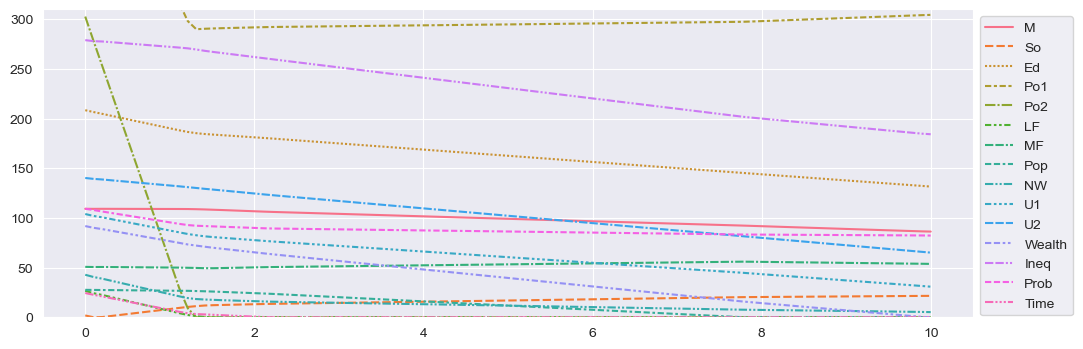

In [8]:
# Lasso Regression
alpha_rng = np.linspace(0.0001,10,100)
df = pd.DataFrame({'alpha':alpha_rng}, columns=X.columns)
for alpha in alpha_rng:
    lasso_model = Lasso(alpha=alpha, max_iter = 10000)
    lasso_model.fit(X, y)
    df.loc[alpha] = (lasso_model.coef_)
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=np.abs(df), ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylim(0,310)
plt.show()

In [9]:
lasso_model = Lasso(alpha=10, max_iter=10000).fit(X,y)
pd.DataFrame({'terms':X.columns, 'coef':lasso_model.coef_, 'abs_coef':np.abs(lasso_model.coef_)}).sort_values('abs_coef',ascending=False)

,terms,coef,abs_coef
3,Po1,304.369306,304.369306
12,Ineq,184.225572,184.225572
2,Ed,131.543097,131.543097
0,M,86.255688,86.255688
13,Prob,-82.245187,82.245187
10,U2,65.057044,65.057044
6,MF,53.720585,53.720585
9,U1,-30.796912,30.796912
1,So,21.561108,21.561108
8,NW,5.201307,5.201307


In [10]:
ridge_coef.sort_values('abs_coef', ascending=False)

,term,coef,abs_coef
3,Po1,127.060070,127.060070
4,Po2,105.655524,105.655524
12,Ineq,99.953285,99.953285
2,Ed,77.716528,77.716528
13,Prob,-77.702472,77.702472
6,MF,68.125628,68.125628
0,M,66.315038,66.315038
10,U2,65.278180,65.278180
1,So,42.799870,42.799870
8,NW,36.938092,36.938092


In [11]:
# use the results of lasso as a starting point
formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2 + MF + U1 + So + NW'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.732   
Dependent Variable:  Crime             AIC:                 640.9736
Date:                2023-08-12 21:53  BIC:                 661.3253
No. Observations:    47                Log-Likelihood:      -309.49 
Df Model:            10                F-statistic:         13.57   
Df Residuals:        36                Prob (F-statistic):  1.85e-09
R-squared:           0.790             Scale:               40071.  
--------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
--------------------------------------------------------------------
Intercept -6399.3935 1224.2252 -5.2273 0.0000  -8882.2372 -3916.5498
Po1         100.1881   17.7261  5.6520 0.0000     64.2378   136.1383
Ineq         57.6081   16.2574  3.5435 0.0011     24.6367    90.5796
Ed          183.3681   54.4539  3.3674 0.0018     72.

In [12]:

formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2 + MF + U1 + So'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.739   
Dependent Variable:  Crime             AIC:                 639.0124
Date:                2023-08-12 21:53  BIC:                 657.5139
No. Observations:    47                Log-Likelihood:      -309.51 
Df Model:            9                 F-statistic:         15.48   
Df Residuals:        37                Prob (F-statistic):  4.56e-10
R-squared:           0.790             Scale:               39020.  
--------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
--------------------------------------------------------------------
Intercept -6398.6541 1208.0589 -5.2966 0.0000  -8846.4139 -3950.8944
Po1         101.4743   15.8659  6.3957 0.0000     69.3268   133.6218
Ineq         58.4651   15.2738  3.8278 0.0005     27.5174    89.4128
Ed          182.5195   53.5150  3.4106 0.0016     74.

In [13]:

formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2 + MF + U1'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.744   
Dependent Variable:  Crime             AIC:                 637.3151
Date:                2023-08-12 21:53  BIC:                 653.9664
No. Observations:    47                Log-Likelihood:      -309.66 
Df Model:            8                 F-statistic:         17.74   
Df Residuals:        38                Prob (F-statistic):  1.16e-10
R-squared:           0.789             Scale:               38239.  
--------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
--------------------------------------------------------------------
Intercept -6426.1010 1194.6105 -5.3792 0.0000  -8844.4636 -4007.7384
Po1         102.6532   15.5239  6.6126 0.0000     71.2267   134.0796
Ineq         61.3349   13.9592  4.3939 0.0001     33.0761    89.5938
Ed          180.1201   52.7533  3.4144 0.0015     73.

In [14]:

formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2 + U1'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.733   
Dependent Variable:   Crime            AIC:                638.5387
Date:                 2023-08-12 21:53 BIC:                653.3399
No. Observations:     47               Log-Likelihood:     -311.27 
Df Model:             7                F-statistic:        19.06   
Df Residuals:         39               Prob (F-statistic): 8.81e-11
R-squared:            0.774            Scale:              39903.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5095.5521  896.8953 -5.6813 0.0000 -6909.6941 -3281.4102
Po1         105.9552   15.7246  6.7382 0.0000    74.1491   137.7613
Ineq         66.3349   13.9166  4.7666 0.0000    38.1860    94.4838
Ed          218.4468   48.3306  4.5198 0.0001   120.6888   316.204

In [15]:

formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2 + MF'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.729   
Dependent Variable:   Crime            AIC:                639.2546
Date:                 2023-08-12 21:53 BIC:                654.0558
No. Observations:     47               Log-Likelihood:     -311.63 
Df Model:             7                F-statistic:        18.69   
Df Residuals:         39               Prob (F-statistic): 1.17e-10
R-squared:            0.770            Scale:              40516.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5666.9069 1152.5033 -4.9170 0.0000 -7998.0650 -3335.7489
Po1         116.5825   13.9091  8.3817 0.0000    88.4486   144.7164
Ineq         65.6866   14.1571  4.6398 0.0000    37.0513    94.3220
Ed          170.2166   54.0125  3.1514 0.0031    60.9661   279.467

In [16]:

formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2'
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.731   
Dependent Variable:   Crime            AIC:                638.1661
Date:                 2023-08-12 21:53 BIC:                651.1172
No. Observations:     47               Log-Likelihood:     -312.08 
Df Model:             6                F-statistic:        21.81   
Df Residuals:         40               Prob (F-statistic): 3.42e-11
R-squared:            0.766            Scale:              40276.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5040.5050  899.8434 -5.6015 0.0000 -6859.1563 -3221.8537
Po1         115.0242   13.7536  8.3632 0.0000    87.2272   142.8212
Ineq         67.6532   13.9357  4.8547 0.0000    39.4880    95.8184
Ed          196.4712   44.7544  4.3900 0.0001   106.0192   286.923

The remaining variables are significant, and $R_a^2 \ge 0.73$

In [17]:
# lets try forward regression and see what we get
formula = 'Crime ~ '
terms = ['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'MF', 'Pop', 'NW', 'U1', 'U2', 'Wealth', 'Ineq', 'Prob', 'Time']
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
M      : -0.0140   696.026   699.726
So     : -0.0138   696.016   699.716
Ed     :  0.0843   691.231   694.931
Po1    :  0.4611   666.315   670.016
Po2    :  0.4322   668.772   672.473
LF     :  0.0142   694.697   698.397
MF     :  0.0246   694.202   697.903
Pop    :  0.0942   690.721   694.421
NW     : -0.0211   696.354   700.054
U1     : -0.0196   696.284   699.984
U2     :  0.0099   694.902   698.602
Wealth :  0.1769   686.223   689.923
Ineq   :  0.0105   694.873   698.573
Prob   :  0.1645   686.922   690.622
Time   :  0.0007   695.336   699.036


In [18]:
add_term = 'Po1'
formula += add_term
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
M      :  0.5425   659.557   665.108
So     :  0.4821   665.387   670.938
Ed     :  0.4490   668.306   673.856
Po2    :  0.4710   666.383   671.933
LF     :  0.4606   667.301   672.851
MF     :  0.4869   664.952   670.503
Pop    :  0.4497   668.242   673.792
NW     :  0.4842   665.203   670.754
U1     :  0.4493   668.278   673.829
U2     :  0.4515   668.084   673.634
Wealth :  0.4763   665.912   671.462
Ineq   :  0.5612   657.596   663.146
Prob   :  0.4629   667.104   672.655
Time   :  0.4554   667.753   673.303


In [19]:
add_term = 'Ineq'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
M      :  0.5792   656.549   663.950
So     :  0.5563   659.043   666.444
Ed     :  0.6423   648.914   656.315
Po2    :  0.5558   659.094   666.494
LF     :  0.5915   655.151   662.552
MF     :  0.6217   651.546   658.947
Pop    :  0.5713   657.424   664.825
NW     :  0.5567   658.999   666.399
U1     :  0.5514   659.558   666.959
U2     :  0.5511   659.592   666.992
Wealth :  0.5843   655.978   663.379
Prob   :  0.5947   654.790   662.190
Time   :  0.5511   659.588   666.988


In [20]:
add_term = 'Ed'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
M      :  0.6719   645.750   655.001
So     :  0.6344   650.830   660.081
Po2    :  0.6406   650.036   659.287
LF     :  0.6349   650.766   660.017
MF     :  0.6524   648.461   657.712
Pop    :  0.6400   650.104   659.355
NW     :  0.6345   650.828   660.079
U1     :  0.6350   650.764   660.015
U2     :  0.6437   649.628   658.879
Wealth :  0.6464   649.261   658.512
Prob   :  0.6712   645.851   655.102
Time   :  0.6436   649.635   658.886


In [21]:
add_term = 'M'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
So     :  0.6644   647.678   658.778
Po2    :  0.6713   646.704   657.805
LF     :  0.6644   647.682   658.783
MF     :  0.6760   646.023   657.124
Pop    :  0.6652   647.565   658.666
NW     :  0.6666   647.373   658.474
U1     :  0.6722   646.577   657.678
U2     :  0.6967   642.929   654.029
Wealth :  0.6905   643.869   654.970
Prob   :  0.7060   641.464   652.565
Time   :  0.6709   646.765   657.866


In [22]:
add_term = 'Prob'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
So     :  0.7023   642.888   655.839
Po2    :  0.7050   642.464   655.415
LF     :  0.6988   643.438   656.389
MF     :  0.7127   641.208   654.159
Pop    :  0.7066   642.204   655.155
NW     :  0.6988   643.443   656.394
U1     :  0.7074   642.080   655.031
U2     :  0.7307   638.166   651.117
Wealth :  0.7131   641.154   654.105
Time   :  0.7003   643.198   656.149


In [23]:
add_term = 'U2'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
So     :  0.7269   639.639   654.440
Po2    :  0.7281   639.431   654.232
LF     :  0.7261   639.780   654.581
MF     :  0.7291   639.255   654.056
Pop    :  0.7326   638.645   653.446
NW     :  0.7239   640.156   654.957
U1     :  0.7332   638.539   653.340
Wealth :  0.7341   638.385   653.186
Time   :  0.7251   639.957   654.758


$R_a^2$ continues to increase, but AIC and BIC both increase.

In [24]:
formula

'Crime ~ Po1 + Ineq + Ed + M + Prob + U2'

In [25]:
# try another and see what happens
add_term = 'Wealth'
formula += f' + {add_term}'
terms.remove(add_term)
print('Term   :    R2a      AIC       BIC')
for next_term in terms:
    model = smf.ols(formula + '+' + next_term, data=crime).fit()
    print(f'{next_term:6} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

Term   :    R2a      AIC       BIC
So     :  0.7288   640.095   656.747
Po2    :  0.7310   639.715   656.366
LF     :  0.7284   640.156   656.808
MF     :  0.7315   639.618   656.269
Pop    :  0.7372   638.616   655.267
NW     :  0.7275   640.325   656.977
U1     :  0.7342   639.155   655.806
Time   :  0.7289   640.074   656.725


In [26]:
print(smf.ols(formula, data=crime).fit().summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.734   
Dependent Variable:   Crime            AIC:                638.3850
Date:                 2023-08-12 21:53 BIC:                653.1862
No. Observations:     47               Log-Likelihood:     -311.19 
Df Model:             7                F-statistic:        19.14   
Df Residuals:         39               Prob (F-statistic): 8.28e-11
R-squared:            0.775            Scale:              39773.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5733.5004 1057.5549 -5.4215 0.0000 -7872.6071 -3594.3938
Po1         103.0224   16.8055  6.1303 0.0000    69.0301   137.0147
Ineq         80.5791   17.3982  4.6315 0.0000    45.3879   115.7704
Ed          182.1061   45.9882  3.9598 0.0003    89.0861   275.126

$t$ test for Wealth shows it is not significant, so we will leave it out, which makes it the same as the LASSO/backwards regression

In [4]:
# chosen model
formula = 'Crime ~ Po1 + Ineq + Ed + M + Prob + U2'
model = smf.ols(formula, data=crime).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.731   
Dependent Variable:   Crime            AIC:                638.1661
Date:                 2023-08-14 18:20 BIC:                651.1172
No. Observations:     47               Log-Likelihood:     -312.08 
Df Model:             6                F-statistic:        21.81   
Df Residuals:         40               Prob (F-statistic): 3.42e-11
R-squared:            0.766            Scale:              40276.  
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -5040.5050  899.8434 -5.6015 0.0000 -6859.1563 -3221.8537
Po1         115.0242   13.7536  8.3632 0.0000    87.2272   142.8212
Ineq         67.6532   13.9357  4.8547 0.0000    39.4880    95.8184
Ed          196.4712   44.7544  4.3900 0.0001   106.0192   286.923

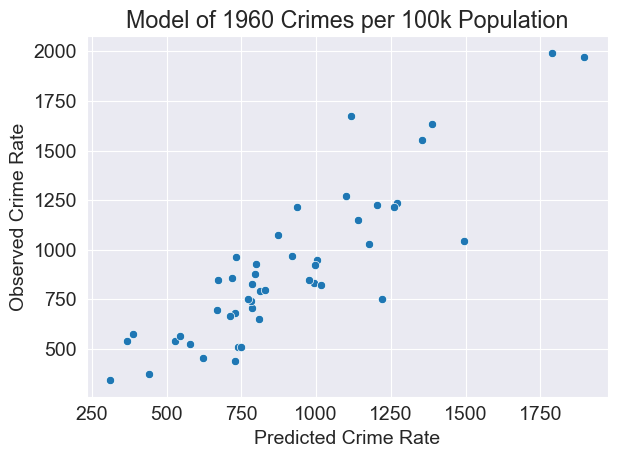

In [28]:
plt.rc('font',size=14)

fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=y, ax=ax)

ax.set_title('Model of 1960 Crimes per 100k Population')
ax.set_xlabel('Predicted Crime Rate')
ax.set_ylabel('Observed Crime Rate')

fig.tight_layout()
fig.savefig('scatter_pred_obs_crime.png')

In [29]:
# standard deviation of the error term
mse = model.mse_resid
s = mse**0.5
s

200.68986372840882

Assessing Model Adequacy (checking assumptions)

In [30]:
# mean error is zero
model.resid.mean()

-2.6946199408910694e-12

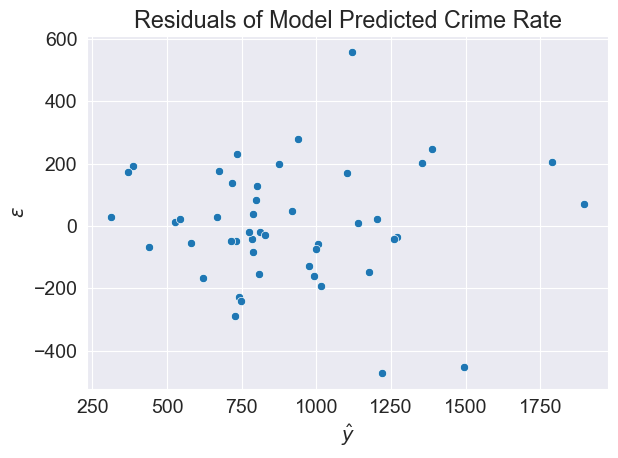

In [31]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=model.resid, ax=ax)

ax.set_title('Residuals of Model Predicted Crime Rate')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('$\epsilon$')
fig.tight_layout()
fig.savefig('res_vs_pred.png')

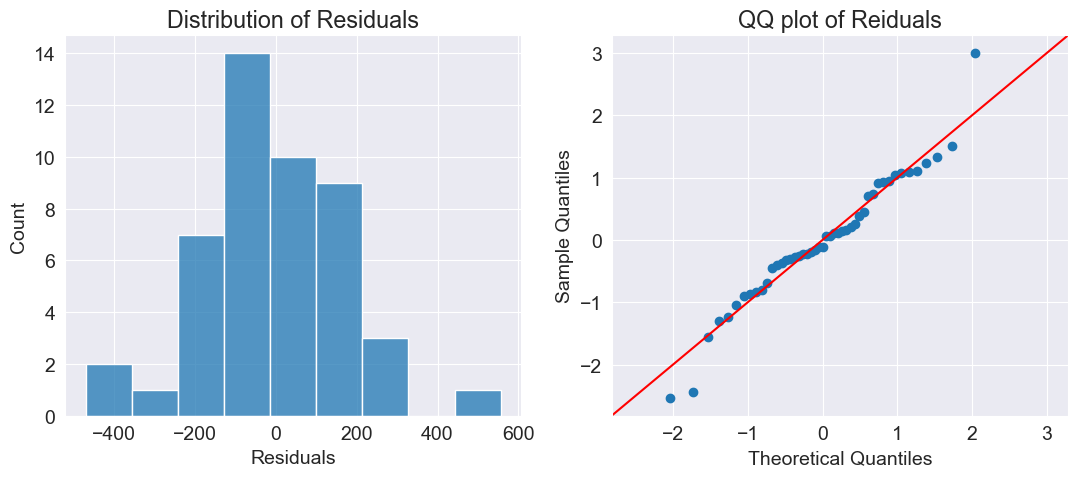

In [32]:
# error normally distributed
fig, axs = plt.subplots(1,2, figsize=(11,5))
sns.histplot(model.resid,ax=axs[0])
sm.qqplot(model.resid, fit=True, line='45', ax=axs[1])

axs[0].set_xlabel('Residuals')
axs[0].set_title('Distribution of Residuals')
axs[1].set_title('QQ plot of Reiduals')
fig.tight_layout()
fig.savefig('hist_resid.png')


In [33]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9689844846725464, pvalue=0.24230097234249115)

In [34]:
# independence of errors
# can't think of how to check this. data is from each state for one year. There could be a dependence due to region of the US, but only the southern states are indicated.

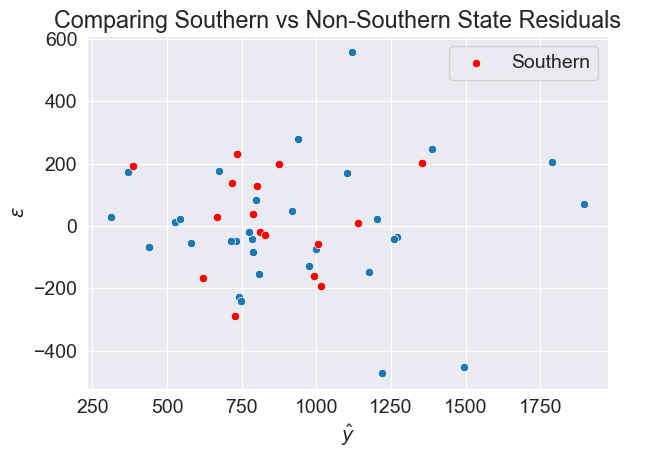

In [35]:
fig, ax= plt.subplots()
sns.scatterplot(x=model.predict(),y=model.resid,ax=ax)
sns.scatterplot(x=model.predict()[crime['So']==1],y=model.resid[crime['So']==1],ax=ax, color='red', label='Southern')

ax.set_title('Comparing Southern vs Non-Southern State Residuals   ')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('$\epsilon$')
fig.tight_layout()
fig.savefig('res_So.png')

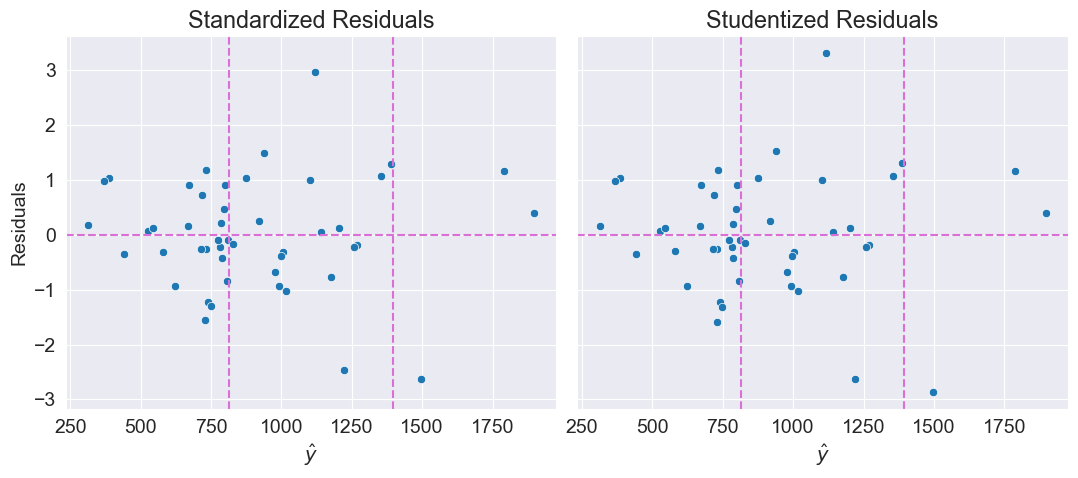

In [37]:
# outliers and influence points
influence = model.get_influence()
standard_resid = influence.resid_studentized_internal
student_resid = influence.resid_studentized_external

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5), sharey=True)
sns.scatterplot(x=model.predict(), y=standard_resid, ax=ax1)
sns.scatterplot(x=model.predict(), y=student_resid, ax=ax2)
xlim = ax.get_xlim()
for ax in [ax1,ax2]:
    ax.axvline(x=xlim[0] + 1/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
    ax.axvline(x=xlim[0] + 2/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
    ax.axhline(y=0, color='orchid', linestyle='--')
    ax.set_xlabel('$\hat{y}$')
    ax.set_ylabel('Residuals')
    
ax1.set_title('Standardized Residuals')
ax2.set_title('Studentized Residuals')
    

fig.tight_layout()

fig.savefig('stand_stud_resid.png')

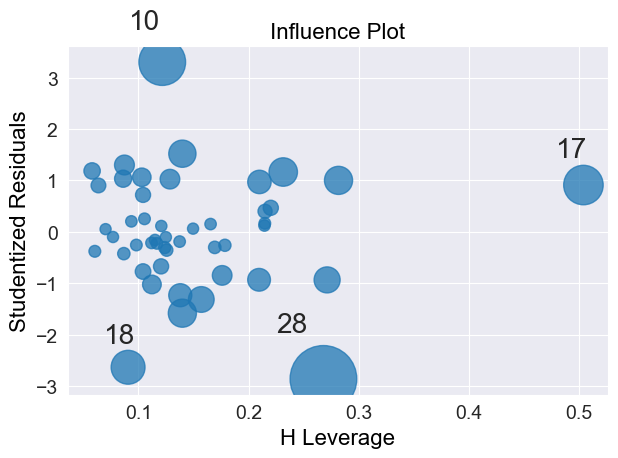

In [38]:
fig, ax = plt.subplots()
smg.influence_plot(model, ax=ax)

plt.tight_layout()
plt.show()

In [5]:
influence_points = [10,17,18,28]
crime.loc[influence_points]

,M,So,Ed,Po1,Po2,LF,MF,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
10,12.4,0,10.5,12.1,11.6,0.580,96.6,101,10.6,0.077,3.5,6570,17.0,0.016201,41.6000,1674
17,13.5,1,10.4,12.3,11.5,0.537,97.8,31,17.0,0.089,3.4,6310,16.5,0.119804,18.1996,929
18,13.0,0,11.6,12.8,12.8,0.536,93.4,51,2.4,0.078,3.4,6270,13.5,0.019099,24.9008,750
28,11.9,0,10.7,16.6,15.7,0.521,93.8,168,8.9,0.092,3.6,6370,15.4,0.023400,36.7009,1043


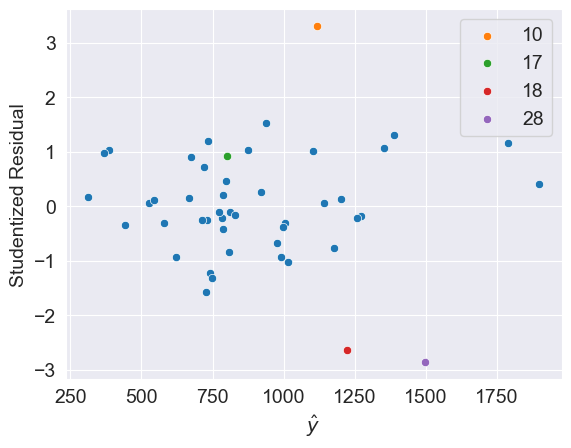

In [40]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=student_resid, ax=ax)

for point in influence_points:
    sns.scatterplot(x=model.predict()[[point]], y=student_resid[[point]], ax=ax, label=f'{point}')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('Studentized Residual')
plt.show()

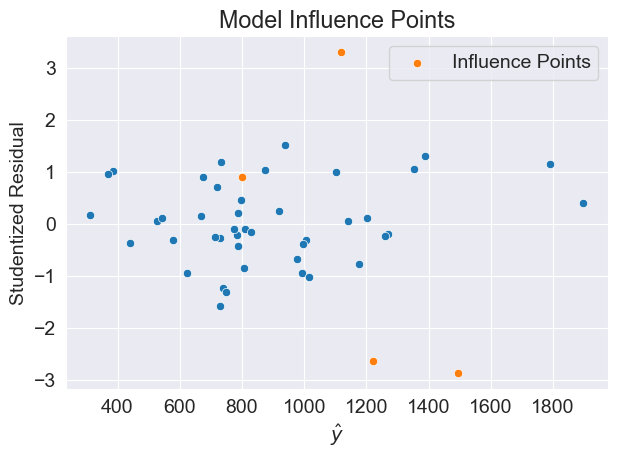

In [41]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=student_resid, ax=ax)
sns.scatterplot(x=model.predict()[influence_points], y=student_resid[influence_points], ax=ax, label='Influence Points')
ax.set_title('Model Influence Points')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('Studentized Residual')
fig.tight_layout()
fig.savefig('influence_points.png')

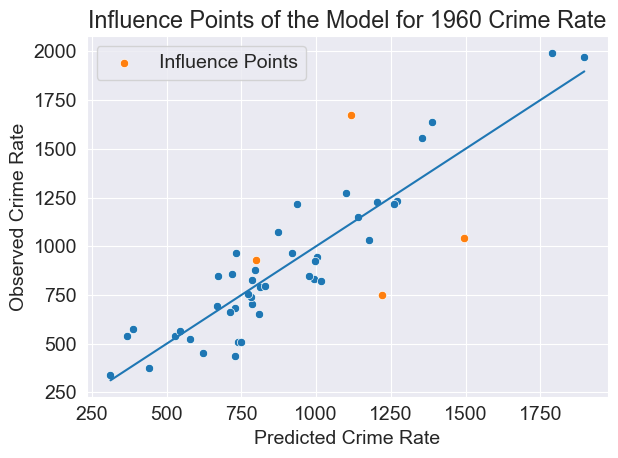

In [13]:
plt.rc('font',size=14)
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=y, ax=ax)
sns.scatterplot(x=model.fittedvalues[influence_points], y=y[influence_points], ax=ax, label='Influence Points')
sns.lineplot(x=model.fittedvalues, y=model.fittedvalues, ax=ax)
ax.set_title('Influence Points of the Model for 1960 Crime Rate')
ax.set_xlabel('Predicted Crime Rate')
ax.set_ylabel('Observed Crime Rate')

fig.tight_layout()
fig.savefig('influence_points_model_obs_pred.png')

In [42]:
# check multicolinearity (Variance Inflation Factors)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [43]:
y, X = dmatrices(formula, data=crime, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

          VIF   features
0  944.889099  Intercept
1    1.908124        Po1
2    3.530429       Ineq
3    2.862893         Ed
4    2.000244          M
5    1.378714       Prob
6    1.363074         U2


In [44]:
# check  if more variables are used
y, X = dmatrices(formula + ' + Po2', data=crime, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

          VIF   features
0  951.950392  Intercept
1   81.960896        Po1
2    3.617045       Ineq
3    2.863118         Ed
4    2.000924          M
5    1.380361       Prob
6    1.372987         U2
7   84.170208        Po2


In [45]:
print(model.summary2().tables[1].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & Coef. & Std.Err. & t & P>|t| & [0.025 & 0.975] \\
\midrule
Intercept & -5040.504977 & 899.843385 & -5.601536 & 0.000002 & -6859.156291 & -3221.853664 \\
Po1 & 115.024191 & 13.753588 & 8.363213 & 0.000000 & 87.227152 & 142.821230 \\
Ineq & 67.653216 & 13.935746 & 4.854653 & 0.000019 & 39.488023 & 95.818409 \\
Ed & 196.471201 & 44.754373 & 4.389989 & 0.000081 & 106.019238 & 286.923163 \\
M & 105.019568 & 33.299251 & 3.153812 & 0.003054 & 37.719272 & 172.319864 \\
Prob & -3801.836279 & 1528.097332 & -2.487954 & 0.017114 & -6890.236181 & -713.436378 \\
U2 & 89.366043 & 40.905669 & 2.184686 & 0.034831 & 6.692603 & 172.039484 \\
\bottomrule
\end{tabular}



In [46]:
crime.describe()

,M,So,Ed,Po1,Po2,LF,MF,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000
